## Getting Price

In [2]:
import MetaTrader5 as mt5
# initialize the MetaTrader 5 terminal
mt5.initialize()
# get the current price of EURUSD
eurusd_tick = mt5.symbol_info_tick("EURUSD")
# print the bid and ask prices
print("Bid - Sell: ", eurusd_tick.bid)
print("Ask - Buy: ", eurusd_tick.ask)
# shut down the MetaTrader 5 terminal
#mt5.shutdown()


Bid - Sell:  1.05641
Ask - Buy:  1.05641


## Fibonacci retracements/extensions 

C:\Users\nuruj\AppData\Local\Temp\ipykernel_5320\2011260262.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  close = df["close"][-1]


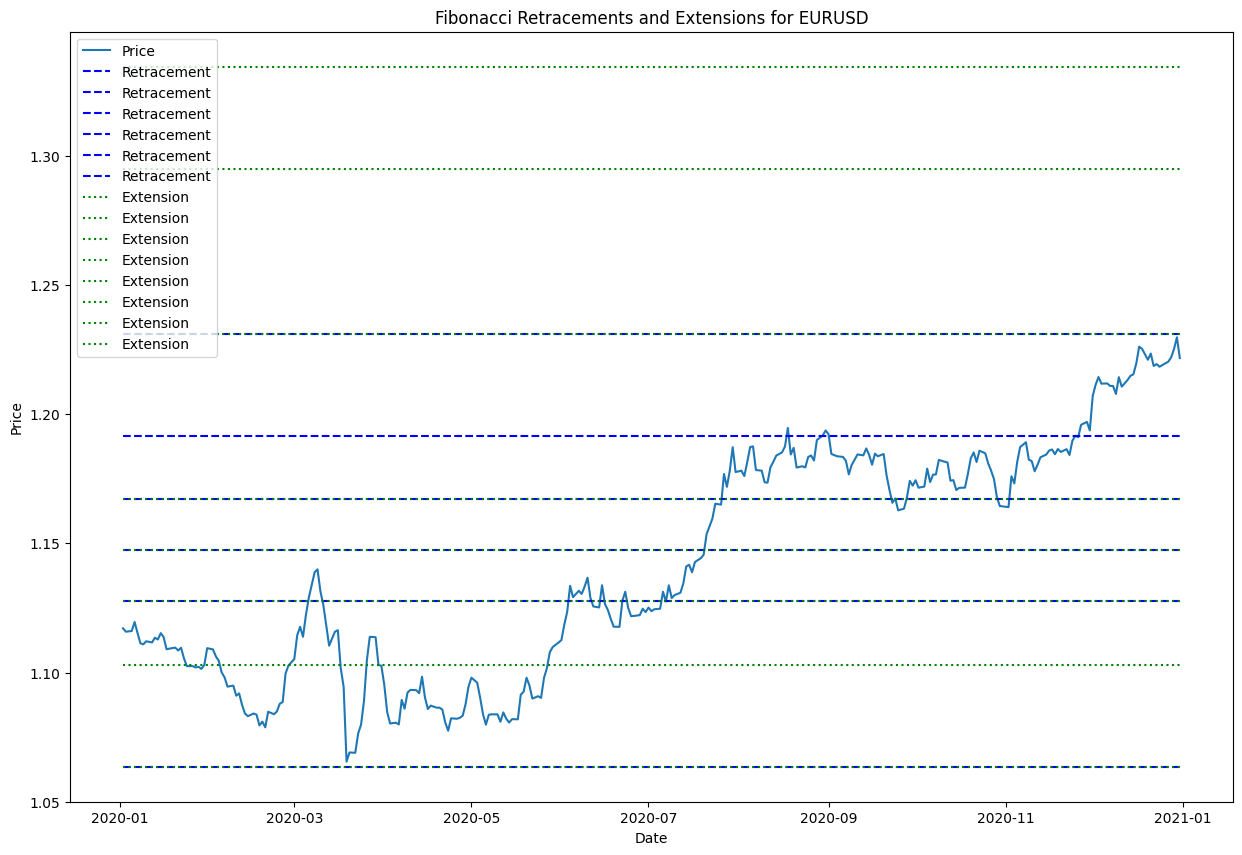


The output of this code is shown in this image. You can see how the Fibonacci levels act as potential support 
and resistance levels for the price movements of EUR/USD. You can use these levels 
to identify possible entry and exit points for your trades, as well as to set your stop loss and profit target levels.


In [4]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initialize the MetaTrader 5 terminal
mt5.initialize()

# get the historical data of EUR/USD from 2020-01-01 to 2020-12-31
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1
start_date = "2020-01-01"
end_date = "2020-12-31"
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# create a DataFrame from the rates
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")
df.set_index("time", inplace=True)

# calculate the high, low, and close prices of the period
high = df["high"].max()
low = df["low"].min()
close = df["close"][-1]

# calculate the Fibonacci retracement levels
retracement_levels = [high, high - 0.236 * (high - low), high - 0.382 * (high - low), high - 0.5 * (high - low), high - 0.618 * (high - low), low]

# calculate the Fibonacci extension levels
extension_levels = [low, low + 0.236 * (high - low), low + 0.382 * (high - low), low + 0.5 * (high - low), low + 0.618 * (high - low), high, high + 0.382 * (high - low), high + 0.618 * (high - low)]

# plot the price chart and the Fibonacci levels
plt.figure(figsize=(15,10))
plt.plot(df.index, df["close"], label="Price")
for level in retracement_levels:
    plt.hlines(level, xmin=df.index[0], xmax=df.index[-1], colors="blue", linestyles="dashed", label="Retracement")
for level in extension_levels:
    plt.hlines(level, xmin=df.index[0], xmax=df.index[-1], colors="green", linestyles="dotted", label="Extension")
plt.title(f"Fibonacci Retracements and Extensions for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
print('''
The output of this code is shown in this image. You can see how the Fibonacci levels act as potential support 
and resistance levels for the price movements of EUR/USD. You can use these levels 
to identify possible entry and exit points for your trades, as well as to set your stop loss and profit target levels.''')

# shut down the MetaTrader 5 terminal


## Pivot points

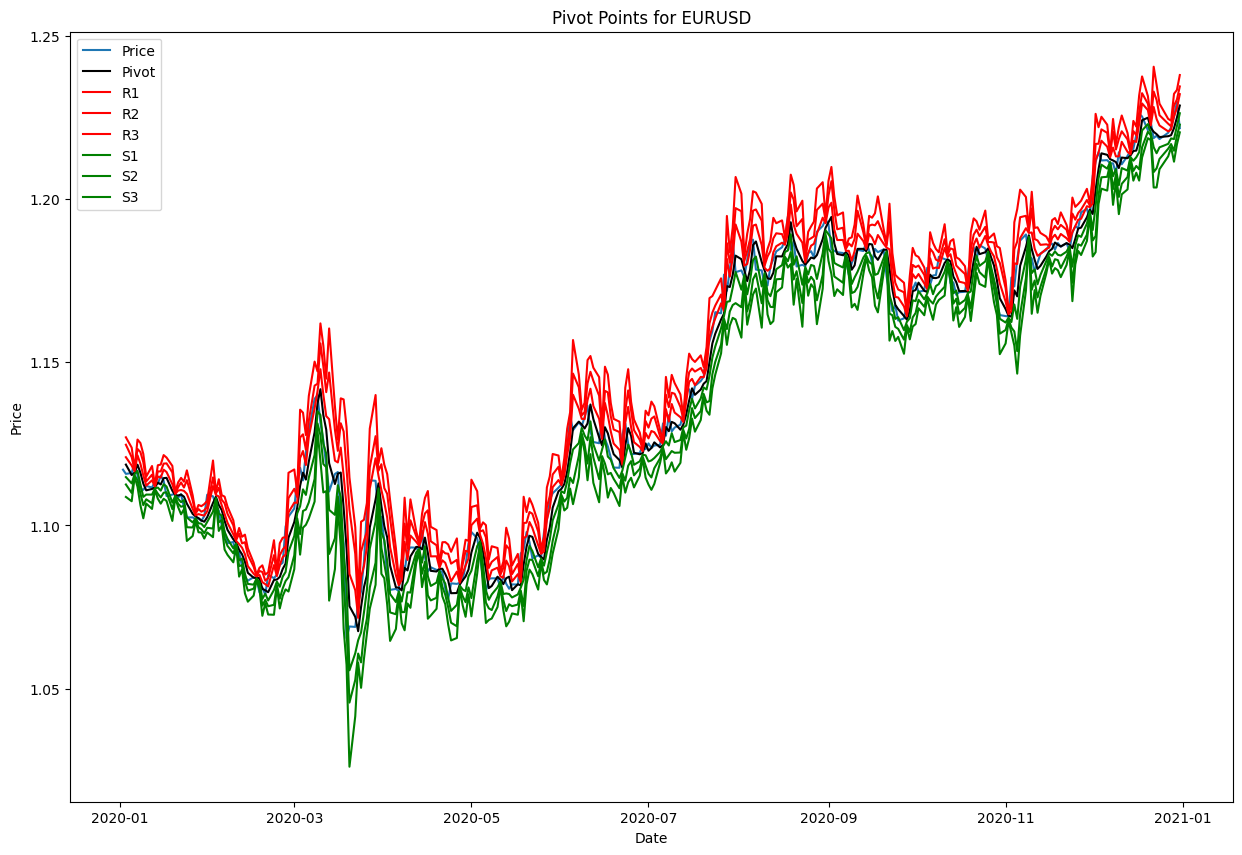


The output of this code is shown in this image. You can see how the pivot point and the support and resistance levels act as 
potential turning points for the price movements of EUR/USD. You can use these 
levels to identify possible entry and exit points for your trades, as well as to set your stop loss and profit target levels.



In [5]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initialize the MetaTrader 5 terminal
mt5.initialize()

# get the historical data of EUR/USD from 2020-01-01 to 2020-12-31
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1
start_date = "2020-01-01"
end_date = "2020-12-31"
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# create a DataFrame from the rates
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")
df.set_index("time", inplace=True)

# calculate the high, low, and close prices of the previous period
high = df["high"].shift(1)
low = df["low"].shift(1)
close = df["close"].shift(1)

# calculate the pivot point and the support and resistance levels using the classic method
pivot = (high + low + close) / 3
r1 = (2 * pivot) - low
r2 = pivot + (high - low)
r3 = high + 2 * (pivot - low)
s1 = (2 * pivot) - high
s2 = pivot - (high - low)
s3 = low - 2 * (high - pivot)

# add the pivot point and the support and resistance levels to the DataFrame
df["pivot"] = pivot
df["r1"] = r1
df["r2"] = r2
df["r3"] = r3
df["s1"] = s1
df["s2"] = s2
df["s3"] = s3

# plot the price chart and the pivot point and the support and resistance levels
plt.figure(figsize=(15,10))
plt.plot(df.index, df["close"], label="Price")
plt.plot(df.index, df["pivot"], label="Pivot", color="black")
plt.plot(df.index, df["r1"], label="R1", color="red")
plt.plot(df.index, df["r2"], label="R2", color="red")
plt.plot(df.index, df["r3"], label="R3", color="red")
plt.plot(df.index, df["s1"], label="S1", color="green")
plt.plot(df.index, df["s2"], label="S2", color="green")
plt.plot(df.index, df["s3"], label="S3", color="green")
plt.title(f"Pivot Points for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# shut down the MetaTrader 5 terminal
print('''
The output of this code is shown in this image. You can see how the pivot point and the support and resistance levels act as 
potential turning points for the price movements of EUR/USD. You can use these 
levels to identify possible entry and exit points for your trades, as well as to set your stop loss and profit target levels.
''')


##  Awesome Oscillator (AO)

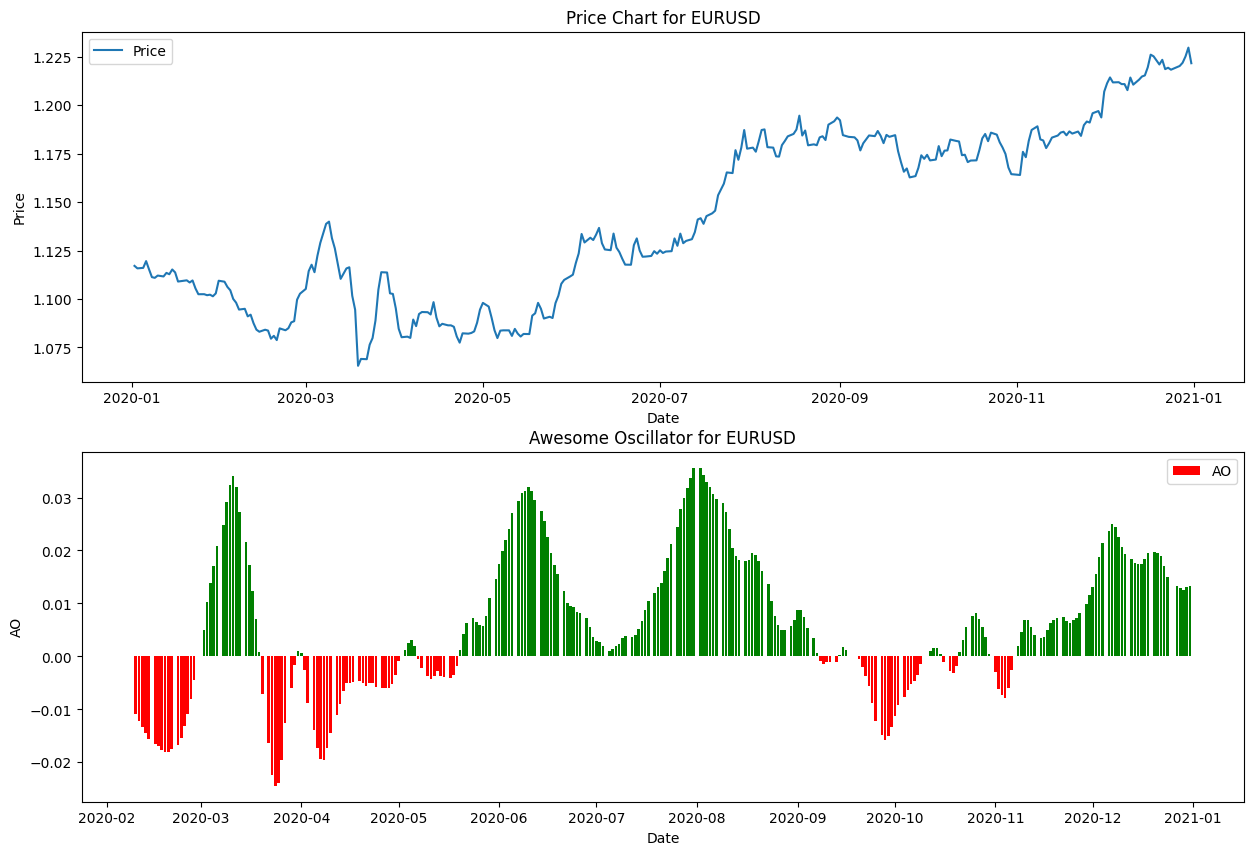

The output of this code is shown in this image. You can see how the Awesome Oscillator measures the momentum of the 
market by comparing the 5-period and 34-period simple moving averages of the median price. You can use this indicator to 
identify the strength and direction of the trend, as well as possible divergence and reversal signals. 
For example, you can look for bullish or bearish saucer patterns, zero line crossovers, or twin peaks formations. 
[https://top-trading-indicators.com/base/awesome-oscillator-indicator-mt5/] 


In [6]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initialize the MetaTrader 5 terminal
mt5.initialize()

# get the historical data of EUR/USD from 2020-01-01 to 2020-12-31
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1
start_date = "2020-01-01"
end_date = "2020-12-31"
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# create a DataFrame from the rates
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")
df.set_index("time", inplace=True)

# calculate the median price of each period
df["median"] = (df["high"] + df["low"]) / 2

# calculate the 5-period and 34-period simple moving averages of the median price
df["sma5"] = df["median"].rolling(5).mean()
df["sma34"] = df["median"].rolling(34).mean()

# calculate the Awesome Oscillator as the difference between the two moving averages
df["ao"] = df["sma5"] - df["sma34"]

# plot the price chart and the Awesome Oscillator
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(df.index, df["close"], label="Price")
plt.title(f"Price Chart for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.subplot(2,1,2)
plt.bar(df.index, df["ao"], label="AO", color=np.where(df["ao"] >= 0, "green", "red"))
plt.title(f"Awesome Oscillator for {symbol}")
plt.xlabel("Date")
plt.ylabel("AO")
plt.legend()
plt.show()

# shut down the MetaTrader 5 terminal
print('''The output of this code is shown in this image. You can see how the Awesome Oscillator measures the momentum of the 
market by comparing the 5-period and 34-period simple moving averages of the median price. You can use this indicator to 
identify the strength and direction of the trend, as well as possible divergence and reversal signals. 
For example, you can look for bullish or bearish saucer patterns, zero line crossovers, or twin peaks formations. 
[https://top-trading-indicators.com/base/awesome-oscillator-indicator-mt5/] ''')


## Relative Strength Index (RSI)

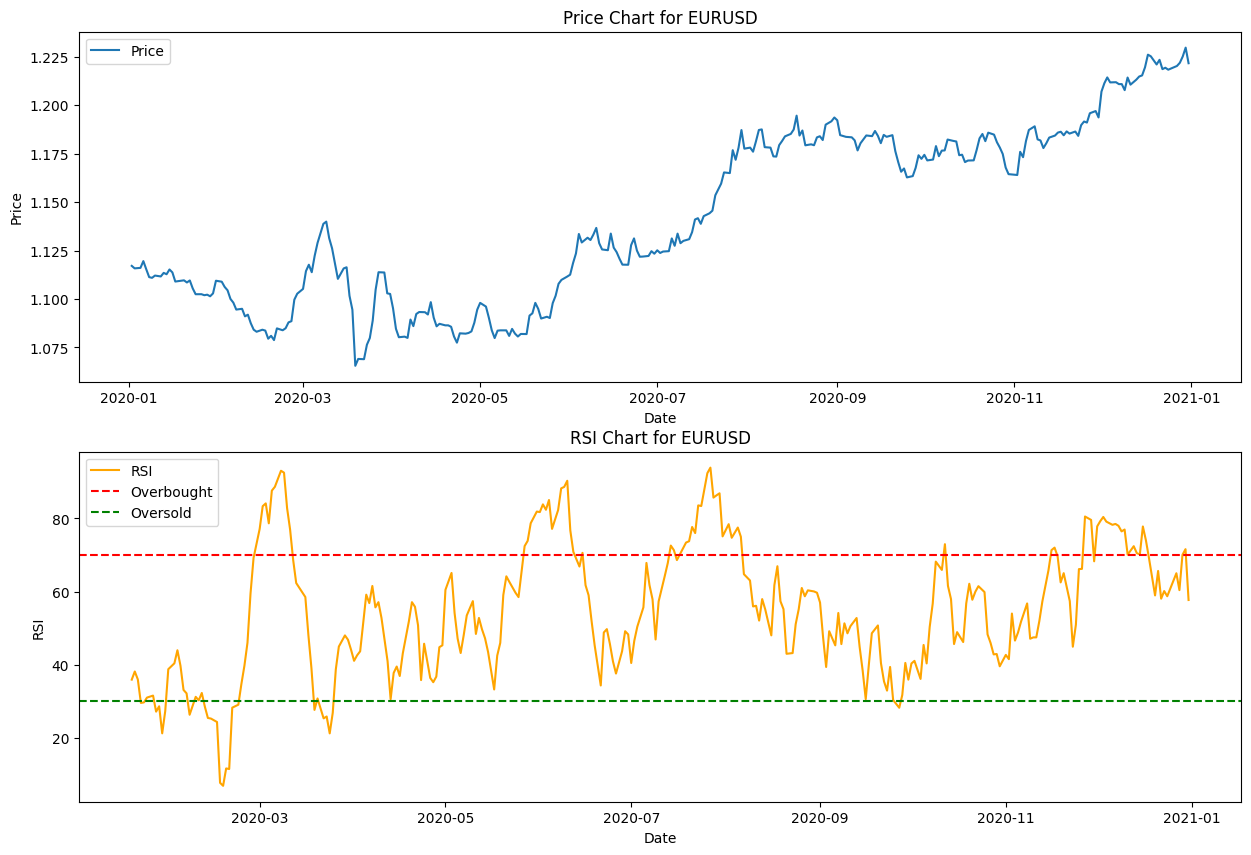

 The output of this code is shown in this image. You can see how the RSI measures the speed and change of price 
movements by comparing the recent gains and losses of a currency pair. You can use this indicator to identify overbought 
and oversold conditions, as well as trend confirmation and divergence signals. For example, you can look for RSI values above 
70 or below 30, RSI crossing above or below 50, or RSI forming higher highs or lower lows while the price does the opposite.
[https://github.com/mtamer/python-rsi]




In [7]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initialize the MetaTrader 5 terminal
mt5.initialize()

# get the historical data of EUR/USD from 2020-01-01 to 2020-12-31
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1
start_date = "2020-01-01"
end_date = "2020-12-31"
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# create a DataFrame from the rates
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")
df.set_index("time", inplace=True)

# calculate the price change of each period
df["change"] = df["close"].diff()

# calculate the average gain and average loss over a 14-period window
df["gain"] = df["change"].clip(lower=0)
df["loss"] = df["change"].clip(upper=0).abs()
df["avg_gain"] = df["gain"].rolling(14).mean()
df["avg_loss"] = df["loss"].rolling(14).mean()

# calculate the relative strength and the RSI
df["rs"] = df["avg_gain"] / df["avg_loss"]
df["rsi"] = 100 - (100 / (1 + df["rs"]))

# plot the price chart and the RSI chart
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(df.index, df["close"], label="Price")
plt.title(f"Price Chart for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.subplot(2,1,2)
plt.plot(df.index, df["rsi"], label="RSI", color="orange")
plt.axhline(70, color="red", linestyle="--", label="Overbought")
plt.axhline(30, color="green", linestyle="--", label="Oversold")
plt.title(f"RSI Chart for {symbol}")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

# shut down the MetaTrader 5 terminal
print(''' The output of this code is shown in this image. You can see how the RSI measures the speed and change of price 
movements by comparing the recent gains and losses of a currency pair. You can use this indicator to identify overbought 
and oversold conditions, as well as trend confirmation and divergence signals. For example, you can look for RSI values above 
70 or below 30, RSI crossing above or below 50, or RSI forming higher highs or lower lows while the price does the opposite.
[https://github.com/mtamer/python-rsi]

''')


## Stochastic Oscillator

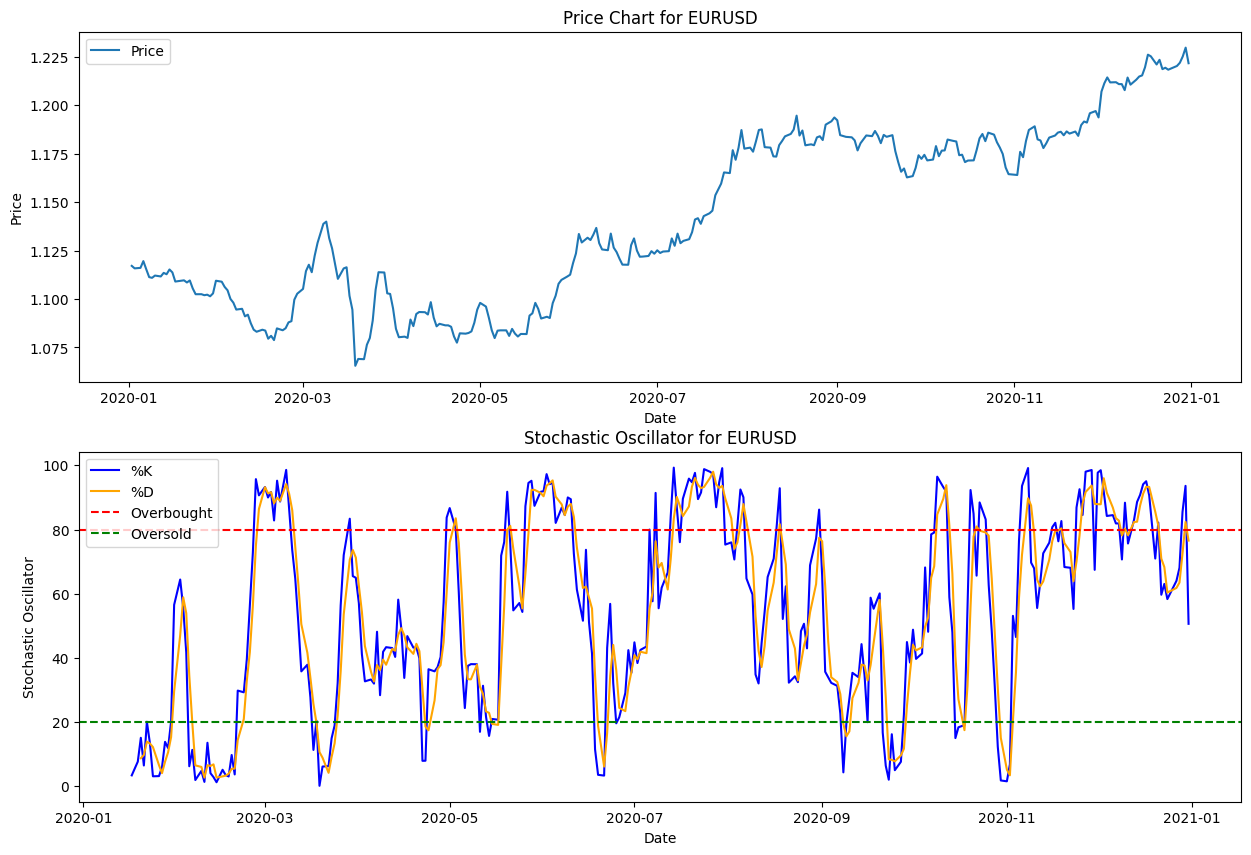

 The output of this code is shown in this image. You can see how the Stochastic Oscillator compares the closing price 
of a currency pair to its price range over a certain period of time. You can use this indicator to identify overbought and 
oversold conditions, as well as trend direction and crossover signals. For example, you can look for %K and %D values above 80 
or below 20, %K crossing above or below %D, or %K and %D forming higher highs or lower lows while the price does the opposite.


In [8]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initialize the MetaTrader 5 terminal
mt5.initialize()

# get the historical data of EUR/USD from 2020-01-01 to 2020-12-31
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1
start_date = "2020-01-01"
end_date = "2020-12-31"
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# create a DataFrame from the rates
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")
df.set_index("time", inplace=True)

# calculate the high, low, and close prices of each period
high = df["high"]
low = df["low"]
close = df["close"]

# calculate the lowest low and highest high over a 14-period window
lowest_low = low.rolling(14).min()
highest_high = high.rolling(14).max()

# calculate the %K line as the ratio of the current close to the lowest low and highest high range
df["%K"] = 100 * ((close - lowest_low) / (highest_high - lowest_low))

# calculate the %D line as the 3-period simple moving average of the %K line
df["%D"] = df["%K"].rolling(3).mean()

# plot the price chart and the Stochastic Oscillator chart
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(df.index, df["close"], label="Price")
plt.title(f"Price Chart for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.subplot(2,1,2)
plt.plot(df.index, df["%K"], label="%K", color="blue")
plt.plot(df.index, df["%D"], label="%D", color="orange")
plt.axhline(80, color="red", linestyle="--", label="Overbought")
plt.axhline(20, color="green", linestyle="--", label="Oversold")
plt.title(f"Stochastic Oscillator for {symbol}")
plt.xlabel("Date")
plt.ylabel("Stochastic Oscillator")
plt.legend()
plt.show()

# shut down the MetaTrader 5 terminal
print(''' The output of this code is shown in this image. You can see how the Stochastic Oscillator compares the closing price 
of a currency pair to its price range over a certain period of time. You can use this indicator to identify overbought and 
oversold conditions, as well as trend direction and crossover signals. For example, you can look for %K and %D values above 80 
or below 20, %K crossing above or below %D, or %K and %D forming higher highs or lower lows while the price does the opposite.''')


## Williams %R

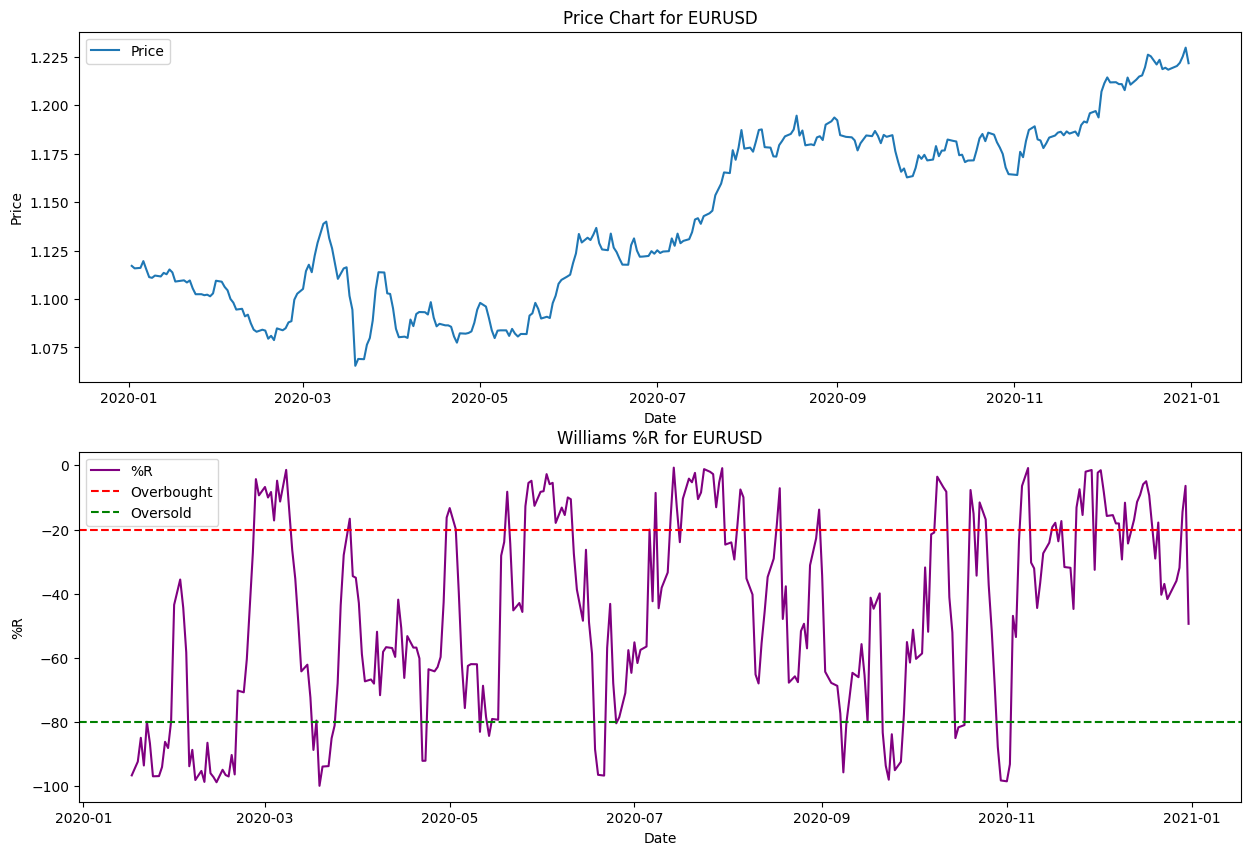

 The output of this code is shown in this image. You can see how the Williams %R measures the current price level 
relative to the highest high and lowest low of a certain period of time. You can use this indicator to identify overbought 
and oversold conditions, as well as trend reversal and breakout signals. For example, you can look for %R values above
-20 or below -80, %R crossing above or below -50, or %R forming higher highs or lower lows while the price does the opposite
[https://www.mql5.com/en/docs/python_metatrader5/mt5symbolsget_py]


In [10]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initialize the MetaTrader 5 terminal
mt5.initialize()

# get the historical data of EUR/USD from 2020-01-01 to 2020-12-31
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1
start_date = "2020-01-01"
end_date = "2020-12-31"
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# create a DataFrame from the rates
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")
df.set_index("time", inplace=True)

# calculate the high, low, and close prices of each period
high = df["high"]
low = df["low"]
close = df["close"]

# calculate the lowest low and highest high over a 14-period window
lowest_low = low.rolling(14).min()
highest_high = high.rolling(14).max()

# calculate the Williams %R as the ratio of the current close to the lowest low and highest high range
df["%R"] = -100 * ((highest_high - close) / (highest_high - lowest_low))

# plot the price chart and the Williams %R chart
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(df.index, df["close"], label="Price")
plt.title(f"Price Chart for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.subplot(2,1,2)
plt.plot(df.index, df["%R"], label="%R", color="purple")
plt.axhline(-20, color="red", linestyle="--", label="Overbought")
plt.axhline(-80, color="green", linestyle="--", label="Oversold")
plt.title(f"Williams %R for {symbol}")
plt.xlabel("Date")
plt.ylabel("%R")
plt.legend()
plt.show()

# shut down the MetaTrader 5 terminal
print(''' The output of this code is shown in this image. You can see how the Williams %R measures the current price level 
relative to the highest high and lowest low of a certain period of time. You can use this indicator to identify overbought 
and oversold conditions, as well as trend reversal and breakout signals. For example, you can look for %R values above
-20 or below -80, %R crossing above or below -50, or %R forming higher highs or lower lows while the price does the opposite
[https://www.mql5.com/en/docs/python_metatrader5/mt5symbolsget_py]''')


##  Average True Range (ATR)

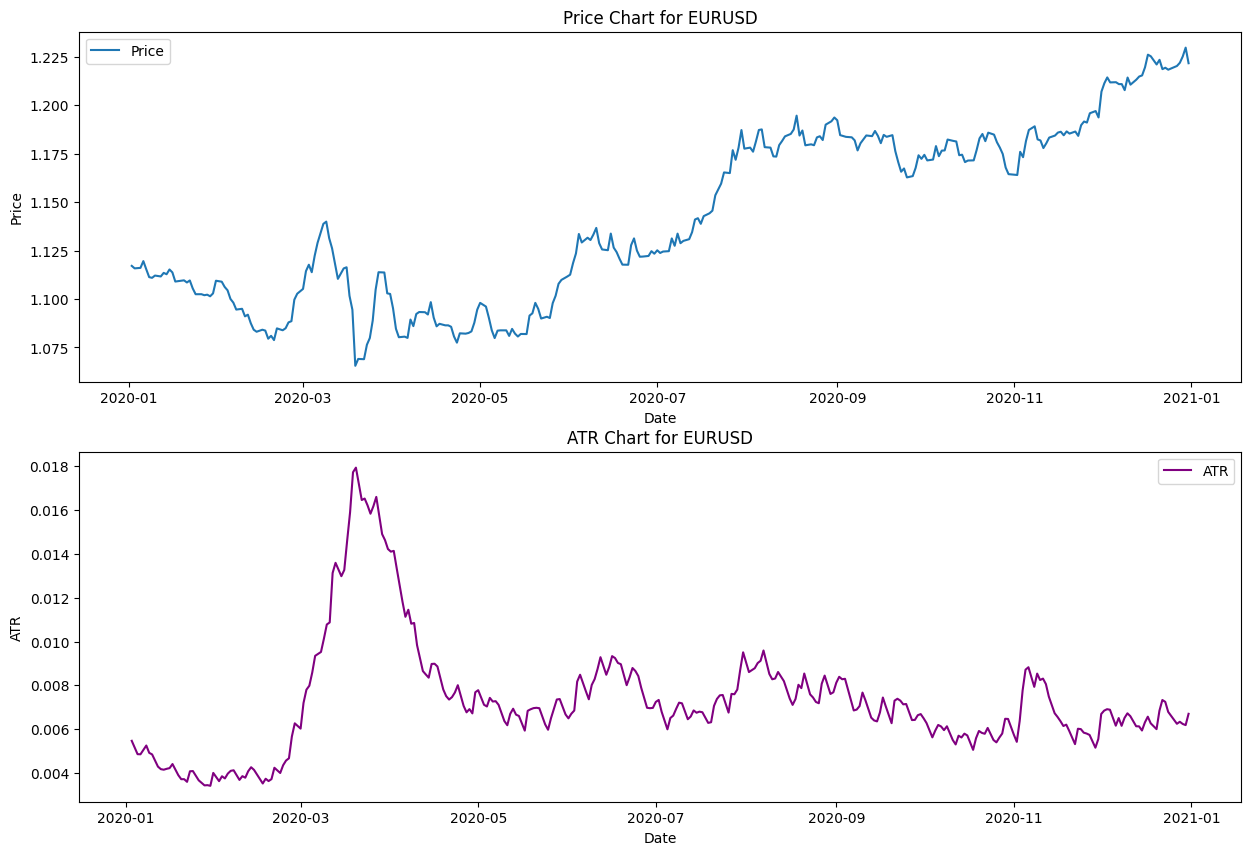

The output of this code is shown in this image. You can see how the ATR measures the volatility of the market by 
calculating the average range of price movements over a certain period of time.
You can use this indicator to determine the optimal position size, stop loss level, and profit target for a trade. 


In [11]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# initialize the MetaTrader 5 terminal
mt5.initialize()

# get the historical data of EUR/USD from 2020-01-01 to 2020-12-31
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1
start_date = "2020-01-01"
end_date = "2020-12-31"
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# create a DataFrame from the rates
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")
df.set_index("time", inplace=True)

# calculate the high, low, and close prices of each period
high = df["high"]
low = df["low"]
close = df["close"]

# calculate the true range of each period as the maximum of the high-low range, the high-close difference, and the low-close difference
df["tr"] = np.maximum(high - low, np.maximum(np.abs(high - close.shift()), np.abs(low - close.shift())))

# calculate the ATR as the 14-period exponential moving average of the true range
df["atr"] = df["tr"].ewm(span=14, adjust=False).mean()

# plot the price chart and the ATR chart
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(df.index, df["close"], label="Price")
plt.title(f"Price Chart for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.subplot(2,1,2)
plt.plot(df.index, df["atr"], label="ATR", color="purple")
plt.title(f"ATR Chart for {symbol}")
plt.xlabel("Date")
plt.ylabel("ATR")
plt.legend()
plt.show()

# shut down the MetaTrader 5 terminal
print('''The output of this code is shown in this image. You can see how the ATR measures the volatility of the market by 
calculating the average range of price movements over a certain period of time.
You can use this indicator to determine the optimal position size, stop loss level, and profit target for a trade. ''')


## Stop Loss Clusters (SLC) Indicator

## Lucky Reversal Indicator

## Buy Sell Magic Indicator

## ARIMA Forecast Example

In [1]:
# Import the MetaTrader5 package and the pandas module in your python code
import MetaTrader5 as mt5
import pandas as pd

# Initialize the MetaTrader 5 terminal using the mt5.initialize() function
mt5.initialize()

# Get the historical data of EUR/USD from a specified date range using the mt5.copy_rates_range function
# You will need to change the start_date and end_date variables to your desired values
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_H1
start_date = "2020-01-01" # change this to your desired start date
end_date = "2023-10-27" # change this to your desired end date
rates = mt5.copy_rates_range(symbol, timeframe, pd.to_datetime(start_date), pd.to_datetime(end_date))

# Create a DataFrame from the rates using the pd.DataFrame function
df = pd.DataFrame(rates)

# Convert the time column to datetime format using the pd.to_datetime function
df["time"] = pd.to_datetime(df["time"], unit="s")

# Set the time column as the index of the DataFrame using the set_index method
df.set_index("time", inplace=True)

# Get the close prices of each period using the df["close"] column
close = df["close"]

# Import the statsmodels package and the matplotlib module
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot the close prices using the plt.plot function to visualize the data
plt.figure(figsize=(10,6))
plt.plot(close, label="Close Price")
plt.title(f"Close Price for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Check if the data is stationary using the augmented Dickey-Fuller test: sm.tsa.stattools.adfuller(close)
adf_result = sm.tsa.stattools.adfuller(close)
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")

# If the data is not stationary, apply differencing or transformation techniques to make it stationary: close_diff = close.diff() or close_log = np.log(close)
# You can choose either differencing or log transformation, or both, depending on your preference and results
close_diff = close.diff()
close_log = np.log(close)

# Plot the transformed data and check its stationarity again
plt.figure(figsize=(10,6))
plt.plot(close_diff, label="Close Price Differenced")
plt.title(f"Close Price Differenced for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

adf_result_diff = sm.tsa.stattools.adfuller(close_diff.dropna())
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"P-value: {adf_result_diff[1]}")
print(f"Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"\t{key}: {value}")

plt.figure(figsize=(10,6))
plt.plot(close_log, label="Close Price Log Transformed")
plt.title(f"Close Price Log Transformed for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

adf_result_log = sm.tsa.stattools.adfuller(close_log)
print(f"ADF Statistic: {adf_result_log[0]}")
print(f"P-value: {adf_result_log[1]}")
print(f"Critical Values:")
for key, value in adf_result_log[4].items():
    print(f"\t{key}: {value}")

# Choose an appropriate order for the ARIMA model based on the autocorrelation and partial autocorrelation plots: sm.graphics.tsa.plot_acf(close_diff.dropna()) and sm.graphics.tsa.plot_pacf(close_diff.dropna())
sm.graphics.tsa.plot_acf(close_diff.dropna())
sm.graphics.tsa.plot_pacf(close_diff.dropna())
plt.show()

# Fit an ARIMA model to the data using the sm.tsa.ARIMA function: model = sm.tsa.ARIMA(close_diff.dropna(), order=(p,d,q)).fit()
# You will need to change the order parameter to your desired values based on the ACF and PACF plots
order = (1,1,1) # change this to your desired order
model = sm.tsa.ARIMA(close_diff.dropna(), order=order).fit()

# Check the model summary and diagnostics: model.summary() and model.plot_diagnostics()
print(model.summary())
model.plot_diagnostics()
plt.show()

# Make predictions for the next hour using the model.forecast function: pred = model.forecast(steps=1)
pred = model.forecast(steps=1)
print(f"Predicted Close Price for Next Hour: {pred}")

# Reverse any transformation or differencing applied to the data: pred = np.exp(pred) or pred = pred + close.iloc[-1]
# You will need to reverse the same transformation or differencing that you applied to the data earlier
pred = pred + close.iloc[-1]
print(f"Predicted Close Price for Next Hour (Reversed): {pred}")

# Plot the actual and predicted prices using the plt.plot function to compare them
plt.figure(figsize=(10,6))
plt.plot(close, label="Actual Price")
plt.plot(close.index[-1] + pd.Timedelta(hours=1), pred, label="Predicted Price", marker="o", color="red")
plt.title(f"Actual and Predicted Price for {symbol}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()




KeyboardInterrupt: 

## Further Reading
#### https://indicatorspot.com/blog/best-entry-and-exit-indicators/
#### https://theforexgeek.com/how-to-determine-entry-and-exit-points-in-forex/
#### https://indicatorspot.com/indicator/lucky-reversal-indicator-mt5/
#### https://www.investopedia.com/articles/forex/10/indicators-fx-traders-must-know.asp